In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

In [2]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from pathlib import Path

In [3]:
import gdown

if not Path('data.csv').exists():
    gdown.download('https://drive.google.com/file/d/1fs9DIiANx3Xqk_dm1DBXznox0WIBzefL/view', fuzzy=True)

In [4]:
data = pd.read_csv('data.csv')
print(data.shape)
data.head()

(60, 2)


,x,y
0,22429,22
1,69326,68
2,95833,94
3,20390,20
4,32624,32


In [5]:
from sklearn.metrics import mean_absolute_percentage_error

In [6]:
a_arr = np.linspace(-0.01, 0.01, 10000)
mapes = []
best_a = -1
min_mape = float('inf')
for a in tqdm(a_arr):
    pred = data['x'] * a
    mape = mean_absolute_percentage_error(data['y'], pred)
    mapes.append(mape)
    if mape <= min_mape:
        min_mape = mape
        best_a = a
print(best_a)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:06<00:00, 1467.47it/s]

0.0014691469146914694


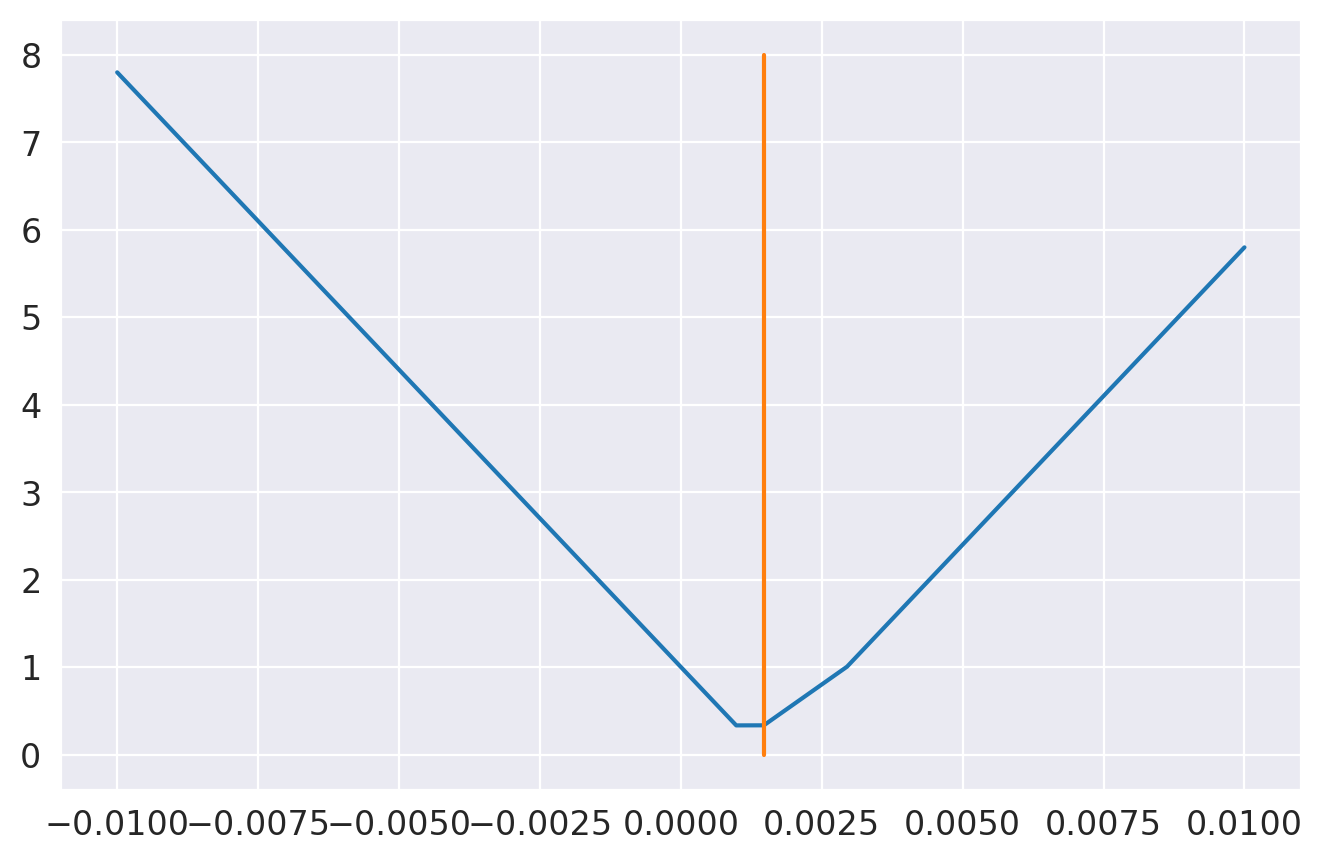

In [7]:
sns.lineplot(x=a_arr, y=mapes)
plt.plot((best_a, best_a), (0, 8))

Поняли, что точка где-то здесь. Надо как-то вывести точную дробь.

In [8]:
from sympy import symbols, Eq, solve, latex, Abs, diff
from sympy.solvers.solveset import linsolve
from sympy.calculus.util import Interval, minimum

from IPython.display import display, Math


Запишем выражение для MAPE по нашему датасету.

In [13]:
a = symbols('a')
y = data['y'].to_list()
x = data['x'].to_list()
f = 0
for x_i, y_i in zip(x, y):
    f += Abs(y_i - x_i * a) / y_i
f

Abs(2039*a - 6)/3 + Abs(4078*a - 12)/12 + Abs(6117*a - 18)/9 + Abs(6117*a - 9)/9 + Abs(8156*a - 24)/12 + Abs(8156*a - 12)/12 + Abs(10195*a - 30)/15 + Abs(10195*a - 10)/10 + Abs(12234*a - 18)/9 + Abs(14273*a - 42)/42 + 2*Abs(14273*a - 21)/21 + Abs(14273*a - 14)/14 + Abs(16312*a - 48)/48 + Abs(18351*a - 54)/54 + 2*Abs(18351*a - 27)/27 + Abs(20390*a - 60)/30 + Abs(20390*a - 30)/15 + Abs(20390*a - 20)/20 + Abs(22429*a - 66)/66 + Abs(22429*a - 33)/33 + Abs(22429*a - 22)/11 + Abs(24468*a - 72)/18 + Abs(24468*a - 36)/36 + Abs(24468*a - 24)/12 + Abs(26507*a - 78)/78 + Abs(28546*a - 42)/42 + Abs(30585*a - 45)/15 + Abs(30585*a - 30)/30 + Abs(32624*a - 32)/32 + 2*Abs(34663*a - 51)/51 + Abs(36702*a - 54)/27 + Abs(38741*a - 38)/38 + Abs(50975*a - 50)/25 + Abs(57092*a - 56)/56 + Abs(65248*a - 64)/64 + Abs(69326*a - 68)/68 + Abs(75443*a - 74)/74 + Abs(77482*a - 76)/76 + Abs(81560*a - 80)/80 + Abs(91755*a - 90)/90 + Abs(95833*a - 94)/94

Возьмём производную и поймём, где она не определена (знаменатель равен нулю). Посмотрим на значения функции в этих точках.

In [11]:
derivative = diff(f, a)
n, d = derivative.as_numer_denom()
critical_points = solve(d, a)
for point in critical_points:
    print(f'Value in {point} is {f.subs(a, point)}')

Value in 2/2039 is 20
Value in 3/2039 is 20
Value in 6/2039 is 60


Таких точек три (как и на графике). Нас интересует максимальная для минимума MAPE, то есть $\frac{3}{2039}$.

In [12]:
ivl = Interval(0, 0.0025)
print(minimum(f, a, ivl))

ValueError: 
Can't calculate derivative wrt 3/2039.

SymPy упал при оптимизации с ошибкой, что не может взять производную как раз в $\frac{3}{2039}$.

In [ ]:
3/2039

0.0014713094654242277